#PCA
http://deeplearning4j.org/eigenvector

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = loadtxt('data_trend.dat')

In [3]:
data

array([[ -2.      ,   0.967111],
       [ -1.939394,   4.0114  ],
       [ -1.878788,   3.430791],
       [ -1.818182,   4.982617],
       [ -1.757576,   5.053784],
       [ -1.69697 ,   2.904391],
       [ -1.636364,   4.052314],
       [ -1.575758,   5.674709],
       [ -1.515152,   1.388921],
       [ -1.454545,   3.694932],
       [ -1.393939,   4.54983 ],
       [ -1.333333,   1.817417],
       [ -1.272727,   1.853369],
       [ -1.212121,   4.448165],
       [ -1.151515,  13.024431],
       [ -1.090909,   6.930409],
       [ -1.030303,  -2.243607],
       [ -0.969697,   7.188162],
       [ -0.909091,   6.354099],
       [ -0.848485,  15.102124],
       [ -0.787879,   5.570636],
       [ -0.727273,   5.814479],
       [ -0.666667,   3.977115],
       [ -0.606061,   6.699882],
       [ -0.545455,   4.44544 ],
       [ -0.484848,   9.977886],
       [ -0.424242,   2.511203],
       [ -0.363636,   4.317207],
       [ -0.30303 ,   4.338039],
       [ -0.242424,   6.995122],
       [ -

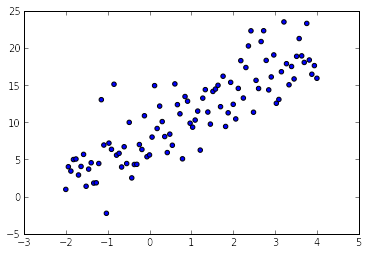

In [4]:
scatter(data[:,0], data[:,1])

In [5]:
COV = np.cov(data)

In [6]:
COV.shape

(100, 100)

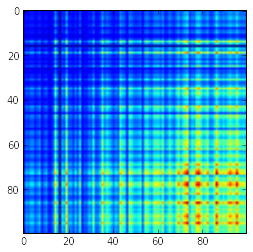

In [7]:
imshow(COV)

In [8]:
new_data = data.copy()

In [9]:
new_data[:,0] = new_data[:,0]-average(new_data[:,0])
new_data[:,1] = new_data[:,1]-average(new_data[:,1])

Centrar los datos restando la media

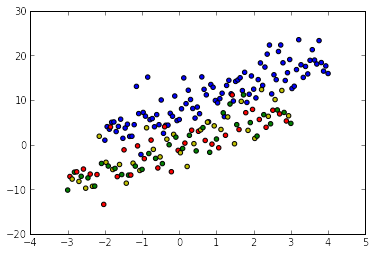

In [10]:
scatter(data[:,0], data[:,1])
scatter(new_data[:,0], new_data[:,1], c='gry')

A estos se les calcula la covarianza. 2 dimensiones --> matriz 2x2

In [11]:
covarianza = np.zeros((2,2))

In [12]:
N = len(data)
x = new_data[:,0]
y = new_data[:,1]

covarianza[0,0] = sum( x**2 )/(N-1)
covarianza[1,1] = sum( y**2 )/(N-1)
covarianza[0,1] = covarianza[1,0] = sum(x*y)/(N-1)

covarianza

array([[  3.09152137,   8.82101855],
       [  8.82101855,  34.56025706]])

Verificar que lo que se hizo a mano está bien.

In [13]:
cov(x)

array(3.091521371288729)

In [14]:
cov(y)

array(34.56025706128334)

Calcular autovectores de la matriz de covarianza.

In [15]:
V0 = linalg.eig(covarianza)[1][:,0]
V1 = linalg.eig(covarianza)[1][:,1]

m0 = V0[1]/V0[0]
m1 = V1[1]/V1[0]

print V0, V1

[-0.96754198  0.25271035] [-0.25271035 -0.96754198]


Estos autovectores dan las direcciones (perpendiculares) de máxima varianza.
Si la diferencia entre ambos es muy grande, (en este caso) tal vez una variable dependa linealmente de la otra.

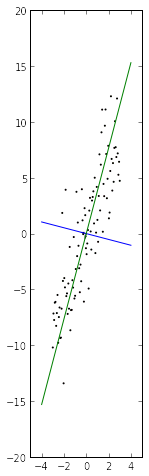

In [16]:
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111,aspect='equal')
scatter(new_data[:,0], new_data[:,1], c='gry', s=1)
quiver(0,0,V0[0], V0[1])
quiver(0,0,V1[0], V1[1])
linx = linspace(-4,4,100)
liny0 = m0*linx
liny1 = m1*linx
plot(linx,liny0)
plot(linx,liny1)

Transformación de coordenadas. Los datos se grafican en la nueva base (la de los autovectores)

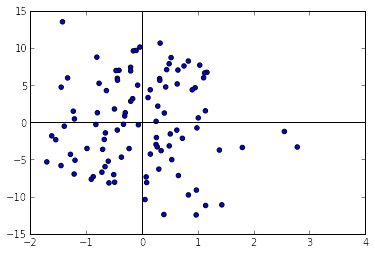

In [17]:
data_rot = zeros(new_data.shape)
#for i in range(100):
data_rot[:] = np.dot(new_data[:], linalg.eig(covarianza)[1])

scatter(data_rot[:,0],data_rot[:,1])
axhline(y=0, c='k')
axvline(x=0, c='k')